# Neural Network - Handwritten Digits Classifier - MdpClassifier 

## Data exploration

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits_data = load_digits()
digits_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
print(digits_data.keys())
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
data.head(1)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


In [4]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
np_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

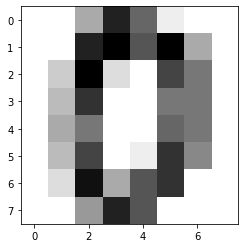

In [5]:
plt.imshow(np_image, cmap='gray_r')

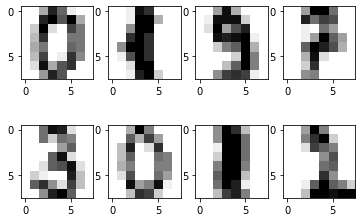

In [6]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## Algorithm Selection

### K-Nearest Neighbours Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, KFold

In [8]:
middle = round(len(data)/2)
train_features = data.iloc[:middle,]
test_features = data.iloc[middle:,]
train_target = labels[:middle]
test_target = labels[middle:]
print(train_features.shape[0], test_features.shape[0], train_target.shape[0], test_target.shape[0])

898 899 898 899


In [9]:
def train_fct(val, train_features, train_target) :
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(train_features, train_target)
    return knn

def test_fct(val, train_features, train_target, test_features, test_target) :
    predictions = train_fct(val, train_features, train_target).predict(test_features)
    acc = accuracy_score(test_target, predictions)
    return acc

def cross_validate(val, df, target) :
    kf = KFold(n_splits=4)
    knn_func = train_fct(val, df, target)
    #mse = cross_val_score(knn_func, df, target, scoring = 'neg_mean_squared_error', cv = kf)
    #rmse = np.sqrt(np.absolute(mse))
    acc = cross_val_score(knn_func, df, target, scoring = None, cv = kf) #None does the default method
    acc_mean = np.mean(acc)
    return acc_mean

print(test_fct(3, train_features, train_target, test_features, test_target))
print(cross_validate(3, data, labels))

0.9632925472747497
0.9627183865379857


In [10]:
knn_vals = []
kfold_vals = []
neighbours = list(range(1,10))

for i in neighbours :
    knn_val = round(test_fct(i, train_features, train_target, test_features, test_target),4)
    knn_vals.append(knn_val)
    kfold_val = round(cross_validate(i, data, labels),4)
    kfold_vals.append(kfold_val)

print(knn_vals)
print(kfold_vals)
print(neighbours)

[0.9611, 0.96, 0.9633, 0.9533, 0.9555, 0.9533, 0.9522, 0.9533, 0.9499]
[0.9677, 0.9616, 0.9627, 0.9649, 0.9622, 0.9588, 0.9572, 0.9572, 0.9544]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


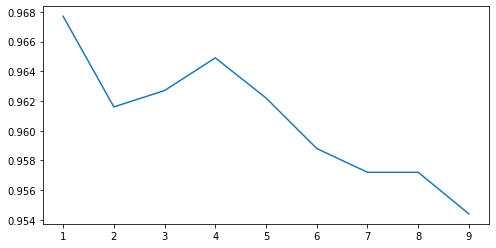

In [11]:
plt.figure(figsize=(8,4))
plt.plot(neighbours, kfold_vals)

### K-Nearest Neighbours Model - Other method for KFold

In [12]:
def train_fct_2(val, train_features, train_target) :
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(train_features, train_target)
    return knn

def test_fct_2(model, test_features, test_target) :
    predictions = model.predict(test_features)
    acc = accuracy_score(test_target, predictions)
    return acc

def cross_validate_2(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_fct_2(k, train_features, train_labels)
        overall_accuracy = test_fct_2(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

knn_one_accuracies = cross_validate_2(3)
print(np.mean(knn_one_accuracies))

0.9872011878247959


In [13]:
kfold_vals_2 = []
neighbours_2 = list(range(1,10))

for i in neighbours_2 :
    kfold_val_2 = round(np.mean(cross_validate_2(i)),4)
    kfold_vals_2.append(kfold_val_2)

print(kfold_vals_2)
print(neighbours_2)

[0.9889, 0.9822, 0.9872, 0.9833, 0.985, 0.9828, 0.9844, 0.9805, 0.9828]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


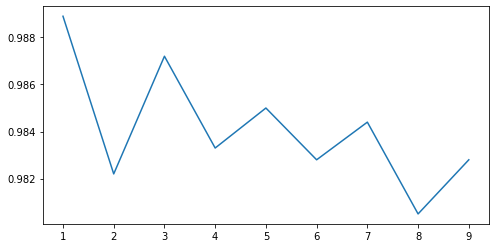

In [14]:
plt.figure(figsize=(8,4))
plt.plot(neighbours_2, kfold_vals_2)

### Neural Network With One Hidden Layer

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
def train_nn1(layer_size, train_features, train_target) :
    clf = MLPClassifier(hidden_layer_sizes=(layer_size))
    clf.fit(train_features, train_target)
    return clf

def test_nn1(model, test_features, test_target) :
    predictions = model.predict(test_features)
    acc = accuracy_score(test_target, predictions)
    return acc

def one_layer(layer_size) :
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn1(layer_size, train_features, train_labels)
        overall_accuracy = test_nn1(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [17]:
layer_tests = [8, 16, 32, 64, 128, 256]
nn1_vals = []

for i in layer_tests :
    nn1_acc = np.mean(one_layer(i))
    nn1_vals.append(nn1_acc)
    
print(nn1_vals)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

[0.891486018312299, 0.9449072011878248, 0.9627134372680028, 0.9682850779510023, 0.9760764662212323, 0.973850532046523]


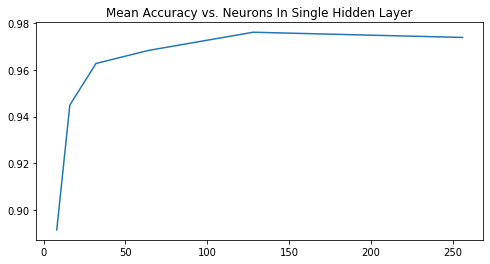

In [18]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(layer_tests, nn1_vals)

When using 1 layer of neurons doesn't seem to be more accurate than the knn method.

In [19]:
nn1_vals

[0.891486018312299,
 0.9449072011878248,
 0.9627134372680028,
 0.9682850779510023,
 0.9760764662212323,
 0.973850532046523]

### Overfitting check - Test on train data

In [20]:
def one_layer_testontrain(layer_size) :
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn1(layer_size, train_features, train_labels)
        overall_accuracy = test_nn1(model, train_features, train_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [21]:
layer_tests = [8, 16, 32, 64, 128, 256]
nn1_vals_testontrain = []

for i in layer_tests :
    nn1_acc = np.mean(one_layer_testontrain(i))
    nn1_vals_testontrain.append(nn1_acc)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [22]:
nn1_vals_testontrain

[0.9350802090148677, 0.9938792712236666, 1.0, 1.0, 1.0, 1.0]

The accuracy reaches 100% on the training data which means it's most likely overfitting.

### Neural Network With Two Hidden Layers

In [23]:
def train_nn2(layer1, layer2, train_features, train_target) :
    clf = MLPClassifier(hidden_layer_sizes=(layer1, layer2))
    clf.fit(train_features, train_target)
    return clf

def test_nn2(model, test_features, test_target) :
    predictions = model.predict(test_features)
    acc = accuracy_score(test_target, predictions)
    return acc

def two_layers(layer1, layer2) :
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn2(layer1, layer2, train_features, train_labels)
        overall_accuracy = test_nn2(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [24]:
layer_tests = [64, 128, 256]
nn2_vals = []

for i in layer_tests :
    nn2_acc = np.mean(two_layers(i,i))
    nn2_vals.append(nn2_acc)
    
print(nn2_vals)

[0.9694011383320961, 0.9755209106656769, 0.9805308092056422]


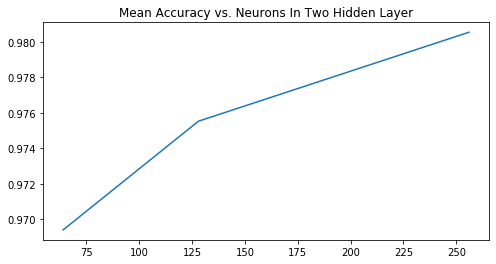

In [25]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layer")
plt.plot(layer_tests, nn2_vals)

### Neural Network With Three Hidden Layers

In [26]:
def train_nn3(layer1, layer2, layer3, train_features, train_target) :
    clf = MLPClassifier(hidden_layer_sizes=(layer1, layer2, layer3))
    clf.fit(train_features, train_target)
    return clf

def test_nn3(model, test_features, test_target) :
    predictions = model.predict(test_features)
    acc = accuracy_score(test_target, predictions)
    return acc

def three_layers(layer1, layer2, layer3) :
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_nn3(layer1, layer2, layer3, train_features, train_labels)
        overall_accuracy = test_nn3(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [27]:
layer_tests = [10, 64, 128]
nn3_vals = []

for i in layer_tests :
    nn3_acc = np.mean(three_layers(i, i, i))
    nn3_vals.append(nn3_acc)
    
print(nn3_vals)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

[0.9354589371980676, 0.9705109624674844, 0.9783054626532888]


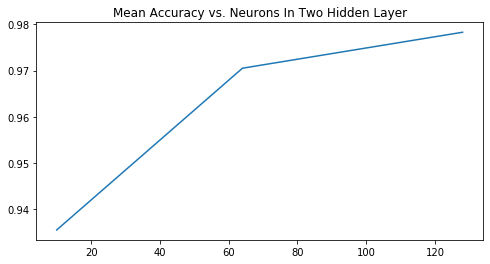

In [28]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layer")
plt.plot(layer_tests, nn3_vals)

With 3 layers, the overall accuracy drops.